In [1]:
from oggm import cfg, workflow, utils, shop
import pandas as pd
import os, glob
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [14]:
v_eb = pd.DataFrame()
v_cl = pd.DataFrame()

var = 'volume'
# var = 'area'

for reg in range(1, 20):
    f = f'../L3-L5_files/elev_bands/w5e5/qc0/pcpwin/match_geod_pergla/RGI62/b_160/L5/summary/historical_run_output_extended_{reg:02d}.nc'
    ds = xr.open_dataset(f)
    
    v = ds[var].load()
    is_null = v.isel(time=-1).isnull().data
    
    f = f'../L3-L5_files/centerlines/w5e5/qc0/pcpwin/match_geod_pergla/RGI62/b_160/L5/summary/historical_run_output_extended_{reg:02d}.nc'
    
    ds = xr.open_dataset(f)
    v2 = ds[var].load()
    is_null = is_null | v2.isel(time=-1).isnull().data
    
    v = v.sel(rgi_id=~is_null)
    v2 = v2.sel(rgi_id=~is_null)
    
    v_eb[f'{reg:02d}'] = v.sel(time=slice(2000, None)).sum(dim='rgi_id').to_series() * 1e-9
    v_cl[f'{reg:02d}'] = v2.sel(time=slice(2000, None)).sum(dim='rgi_id').to_series() * 1e-9

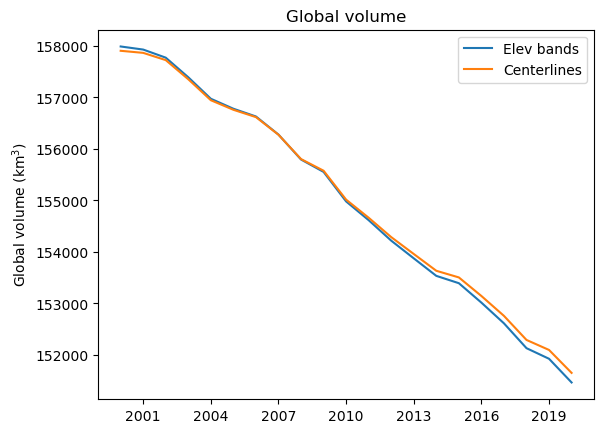

In [15]:
f, ax = plt.subplots()
v_eb.sum(axis=1).plot(ax=ax, label='Elev bands');
v_cl.sum(axis=1).plot(ax=ax, label='Centerlines');
ax.set_ylabel('Global volume (km$^3$)'); ax.set_xlabel('');
ax.legend();
plt.title('Global volume');
ax.xaxis.set_major_locator(MaxNLocator(integer=True))